##### 지구온난화로 봄꽃 개화시기가 앞당겨지고 있는데 실제로 목포지역에서 이런 현상이 발생하는가?
기후데이터와 봄꽃 개화시기데이터를 얻기 위해 온라인 조사를 하였다.

* 기후데이터 : [공공데이터포털](https://https://www.data.go.kr/index.do)

* 봄꽃 개화시기 데이터 : [기상청 기상자료개발포털](https://data.kma.go.kr/data/seasonObs/seasonObsDataList.do?pgmNo=648)
   -> 2000년 이후 전라남도 목포시의 봄꽃(진달래, 매화, 개나리, 벚나무) 데이터만 가져왔다.

데이터 가져오기

- mokpo.csv (1904년부터 목포 기후 데이터)
- flower_bloom.csv (2000년부터 목포 봄꽃 개화시기 데이터)

In [3]:
from google.colab import files
uploaded_file1 = files.upload()
uploaded_file2 = files.upload()

Saving mokpo.csv to mokpo.csv


Saving flower_bloom.csv to flower_bloom.csv


In [4]:
import csv

# 목포 기상 데이터 (1904년 ~ 2023년)
f = open('mokpo.csv', 'r', encoding='cp949')
data = csv.reader(f)
header=next(data) # 헤더 저장

print(header)

for row in data :
    print(row)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['\t2010-01-06', '165', '-1.7', '-3.4', '0.3']
['\t2010-01-07', '165', '-2.1', '-3.7', '0.9']
['\t2010-01-08', '165', '-1.1', '-3.2', '3']
['\t2010-01-09', '165', '0.5', '-3.4', '3.7']
['\t2010-01-10', '165', '2', '0.9', '4']
['\t2010-01-11', '165', '1.1', '0.3', '2.1']
['\t2010-01-12', '165', '-1.5', '-3.1', '1']
['\t2010-01-13', '165', '-3.9', '-6.3', '-2']
['\t2010-01-14', '165', '-2.1', '-6.1', '1.6']
['\t2010-01-15', '165', '1', '-2', '5.9']
['\t2010-01-16', '165', '-1.4', '-4.6', '2.9']
['\t2010-01-17', '165', '-0.1', '-4.3', '5.7']
['\t2010-01-18', '165', '2', '-2.5', '8.1']
['\t2010-01-19', '165', '7.4', '-0.3', '14.3']
['\t2010-01-20', '165', '10.6', '6.1', '13.6']
['\t2010-01-21', '165', '1', '-0.7', '6.1']
['\t2010-01-22', '165', '-0.5', '-1.4', '1']
['\t2010-01-23', '165', '-0.2', '-1.7', '2.3']
['\t2010-01-24', '165', '1.9', '-2.6', '6.3']
['\t2010-01-25', '165', '1.7', '-1.3', '4.9']
['\t2010-01-26', '165', '0.1', '-2.8', '4.9']
['\t201

In [5]:
import csv

# 목포 기상 데이터
f = open('mokpo.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)  # 헤더 저장

print(header)

# 봄꽃 데이터가 2000년부터 이기때문에
# 새로운 파일을 작성하고 데이터를 저장
with open('mokpo2000.csv', 'w', newline='', encoding='utf-8') as new_file:
    writer = csv.writer(new_file)
    writer.writerow(header)  # 헤더를 새 파일에 쓰기

    for row in data:
        date = row[0].strip('"').strip()  # 날짜에서 따옴표와 공백을 제거
        if date >= "2000-01-01":  # 2000년 1월 1일 이후의 날짜만 출력
            writer.writerow(row)  # 새 파일에 해당 행 쓰기


['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


- 4개의 꽃의 개화날짜만 남기고 각 개화날짜를 월,일 정보만 남겼다.

In [6]:
import csv

# 봄꽃 개화 파일 열기
ff = open('flower_bloom.csv', 'r', encoding='cp949')
data_f = csv.reader(ff)
header_f = next(data_f) # 헤더 저장

print(header_f)

for row_f in data_f :
    print(row_f)

['지점', '년도', '진달래', '진달래', '진달래', '진달래', '진달래', '진달래', '매화', '매화', '매화', '매화', '매화', '매화', '개나리', '개나리', '개나리', '개나리', '개나리', '개나리', '벚나무', '벚나무', '벚나무', '벚나무', '벚나무', '벚나무']
['', '', '발아', '발아(평비)', '개화', '개화(평비)', '만발', '만발(평비)', '발아', '발아(평비)', '개화', '개화(평비)', '만발', '만발(평비)', '발아', '발아(평비)', '개화', '개화(평비)', '만발', '만발(평비)', '발아', '발아(평비)', '개화', '개화(평비)', '만발', '만발(평비)']
['목포', '2000', '2000.3.18', '7일', '2000.4.2', '10일', ' ', ' ', '2000.3.10', '17일', '2000.3.20', '8일', '', '', '2000.3.14', '4일', '2000.4.1', '8일', '', '', '2000.3.25', '8일', '2000.4.9', '6일', '', '']
['목포', '2001', '2001.3.20', '9일', '2001.3.29', '6일', ' ', ' ', '2001.2.28', '6일', '2001.3.17', '5일', '', '', '2001.3.16', '6일', '2001.3.26', '2일', '', '', '2001.3.22', '5일', '2001.4.4', '1일', '', '']
['목포', '2002', '2002.3.11', '0일', '2002.3.18', '-5일', ' ', ' ', '2002.2.25', '3일', '2002.3.7', '-5일', '', '', '2002.3.8', '-2일', '2002.3.16', '-8일', '', '', '2002.3.20', '3일', '2002.3.29', '-5일', '', '']
['목포', '2003', '2003

In [7]:
import csv
import pandas as pd

# 봄꽃 개화 파일 열기 (2000년 ~ 2023년)
ff = open('flower_bloom.csv', 'r', encoding='cp949')
data_f = csv.reader(ff)
header_f = next(data_f)  # 헤더 저장

df = pd.DataFrame(data_f, columns=header_f)  # 데이터프레임으로 데이터 로드
df = df.drop(0)  # 0행 삭제
df = df.reset_index(drop=True)  # 인덱스 재설정
flowers = df.iloc[:, [1, 4, 10, 16, 22]].copy()  # 각 꽃들의 개화날짜만 추출

# 월과 일 정보만 남기기
for column in flowers.columns[1:]:
    flowers.loc[:, column] = flowers[column].apply(lambda x: '.'.join(x.split('.')[1:]))

print(flowers)

      년도   진달래    매화   개나리   벚나무
0   2000   4.2  3.20   4.1   4.9
1   2001  3.29  3.17  3.26   4.4
2   2002  3.18   3.7  3.16  3.29
3   2003  3.26  3.10  3.25  3.30
4   2004  3.23   3.9  3.19   4.1
5   2005   4.7  3.14   4.4  4.11
6   2006  3.26  3.21  3.24   4.7
7   2007  3.22  2.26  3.18  3.31
8   2008  3.24  3.12  3.23  3.31
9   2009  3.22   3.5  3.20   4.3
10  2010  3.25  3.20  3.23   4.5
11  2011   4.5  3.14  3.27   4.9
12  2012   4.5   4.2   4.4  4.11
13  2013  3.21  3.13  3.18  3.31
14  2014  3.19  3.14  3.18  3.28
15  2015  3.21   3.7  3.22  3.26
16  2016  3.19   3.6  3.19  3.31
17  2017  3.17   3.8  3.30   4.2
18  2018  3.20  3.15  3.19  3.29
19  2019  3.18   3.1  3.19  3.31
20  2020   3.8  2.24  3.20  3.26
21  2021  3.11  3.14  3.12  3.24
22  2022  3.17  3.14  3.30  3.31
23  2023  3.17  3.20  3.17  3.26


In [8]:
flowers.to_csv('flowers.csv') # 파일 저장

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행 후 런타임 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

flowers.csv 파일을 읽어와서 각 꽃들의 개화 날짜를 그래프로 표현하였다.

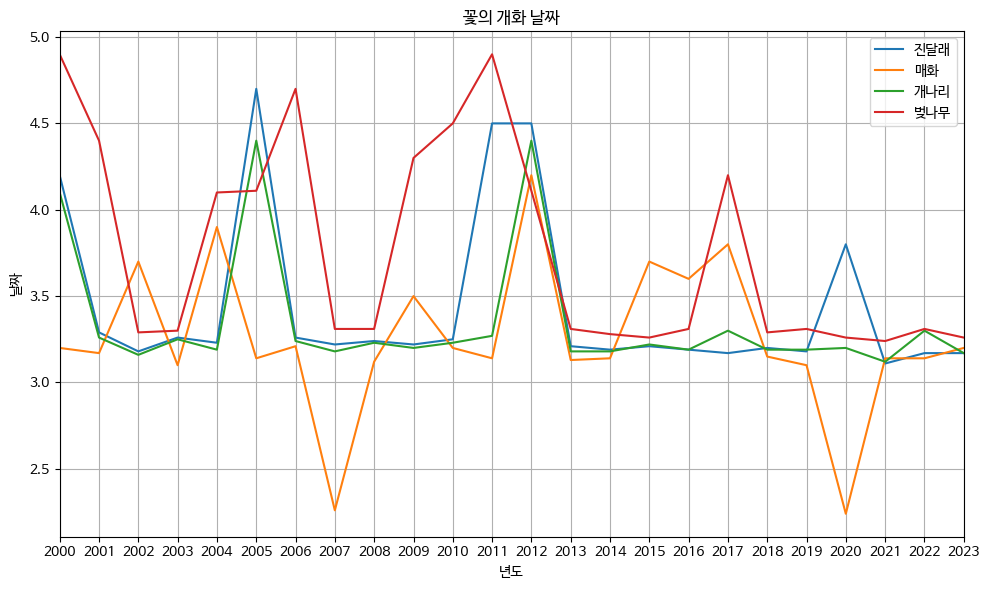

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# flowers.csv 파일 읽기
df2 = pd.read_csv('flowers.csv')
df2 = df2[['년도', '진달래', '매화', '개나리', '벚나무']]

# 년도를 datetime 형식으로 변환
df2['년도'] = pd.to_datetime(df2['년도'], format='%Y')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
# x축 설정: 년도를 모두 표시
ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=1))  # 1년 단위로 표시
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))  # 년도 형식으로 표시

# x축 범위 설정
ax.set_xlim(df2['년도'].min(), df2['년도'].max())

# 그래프 그리기
for flower in ['진달래', '매화', '개나리', '벚나무']:
    ax.plot(df2['년도'], df2[flower], label=flower)

# 범례 표시
ax.legend()

# 그래프 제목 및 축 레이블 설정
plt.rc('font', family='NanumBarunGothic')  # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.title('꽃의 개화 날짜')
plt.xlabel('년도')
plt.ylabel('날짜')

# 그래프 출력
plt.grid(visible=True)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# 데이터를 문자열로 읽어와 데이터프레임에 작성
data3 = {
    '년도': ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    '진달래': ['4.2', '3.29', '3.18', '3.26', '3.23', '4.7', '3.26', '3.22', '3.24', '3.22', '3.25', '4.5', '4.5', '3.21', '3.19', '3.21', '3.19', '3.17', '3.20', '3.18', '3.8', '3.11', '3.17', '3.17'],
    '매화': ['3.20', '3.17', '3.7', '3.10', '3.9', '3.14', '3.21', '2.26', '3.12', '3.5', '3.20', '3.14', '4.2', '3.13', '3.14', '3.7', '3.6', '3.8', '3.15', '3.1', '2.24', '3.14', '3.14', '3.20'],
    '개나리': ['4.1', '3.26', '3.16', '3.25', '3.19', '4.4', '3.24', '3.18', '3.23', '3.20', '3.23', '3.27', '4.4', '3.18', '3.18', '3.22', '3.19', '3.30', '3.19', '3.19', '3.20', '3.12', '3.30', '3.17'],
    '벚나무': ['4.9', '4.4', '3.29', '3.30', '4.1', '4.11', '4.7', '3.31', '3.31', '4.3', '4.5', '4.9', '4.11', '3.31', '3.28', '3.26', '3.31', '4.2', '3.29', '3.31', '3.26', '3.24', '3.31', '3.26']
}

df3 = pd.DataFrame(data3)

# 각 꽃 종류별로 가장 빠른 날짜와 가장 느린 날짜 찾기
flower_dates = {}
for flower in df3.columns[1:]:
    # 월과 일을 합산하여 날짜로 만들기
    df3[flower] = pd.to_datetime(df3[flower], format='%m.%d')
    # 가장 빠른 날짜 찾기
    min_date = df3[flower].min()
    min_year = df3[df3[flower] == min_date]['년도'].values[0]
    # 가장 느린 날짜 찾기
    max_date = df3[flower].max()
    max_year = df3[df3[flower] == max_date]['년도'].values[0]
    flower_dates[flower] = {'빠른 날짜': (min_year, min_date), '느린 날짜': (max_year, max_date)}

# 결과 출력
for flower, dates in flower_dates.items():
    min_year, min_date = dates['빠른 날짜']
    max_year, max_date = dates['느린 날짜']
    print(f"{flower}: 빠른 날짜 - {min_year}년 {min_date.strftime('%m월 %d일')}, 느린 날짜 - {max_year}년 {max_date.strftime('%m월 %d일')}")


진달래: 빠른 날짜 - 2020년 03월 08일, 느린 날짜 - 2005년 04월 07일
매화: 빠른 날짜 - 2020년 02월 24일, 느린 날짜 - 2012년 04월 02일
개나리: 빠른 날짜 - 2021년 03월 12일, 느린 날짜 - 2005년 04월 04일
벚나무: 빠른 날짜 - 2021년 03월 24일, 느린 날짜 - 2005년 04월 11일


위 그래프와 위의 출력결과를 보아 대체적으로 빠른 날짜는 비교적 최근으로 볼 수 있다.

2020년도와 2021년도의 목포 날씨와
2005년, 2012년의 목포 날씨를 나타내보겠다.

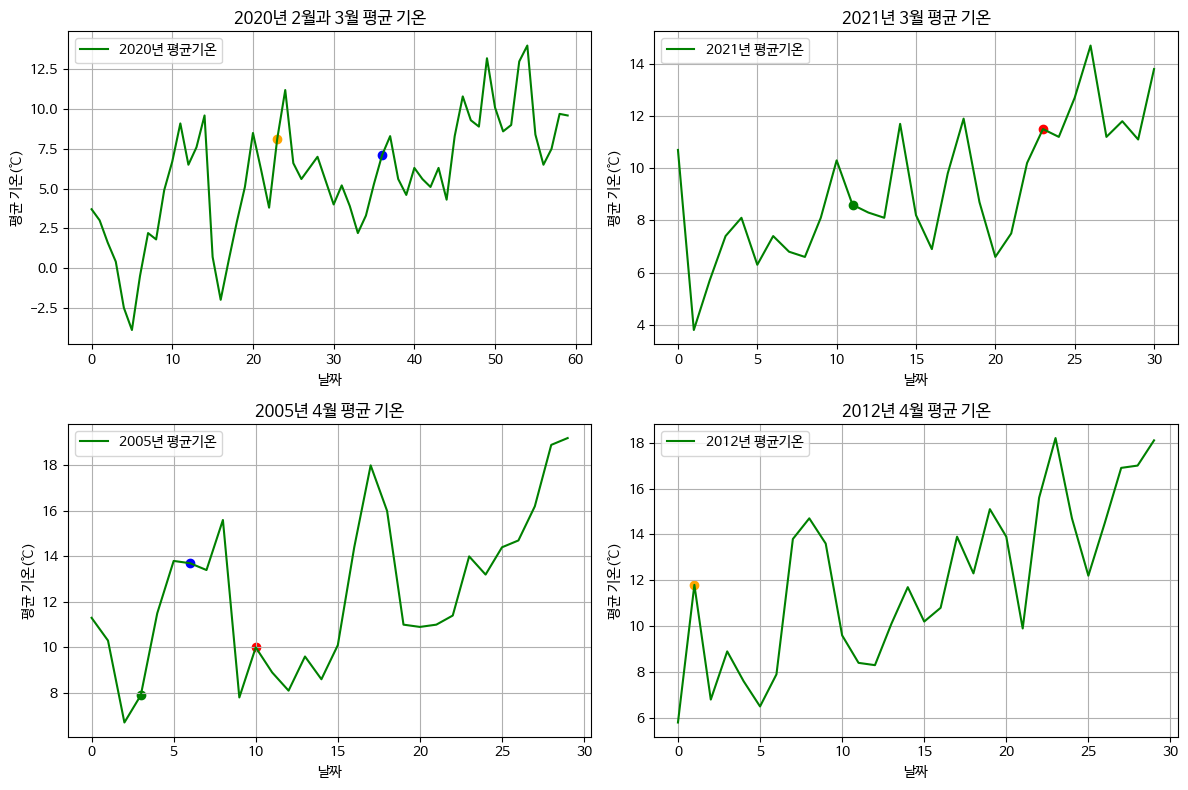

In [5]:
import csv
import matplotlib.pyplot as plt

fm = open('mokpo2000.csv', 'r', encoding='utf-8')
data_m = csv.reader(fm)
next(data_m)

# 각 연도별로 데이터를 저장할 리스트 생성
yearly_data = {2020: {'dates': [], 'temperature_avg': []},
               2021: {'dates': [], 'temperature_avg': []},
               2005: {'dates': [], 'temperature_avg': []},
               2012: {'dates': [], 'temperature_avg': []}}

for row in data_m:
    year = int(row[0].split('-')[0])
    month = row[0].split('-')[1]
    day = row[0].split('-')[2]

    # 2020년 2월과 3월, 2021년 3월, 2005년과 2012년의 4월 데이터
    if ((year == 2020 and (month == '02' or month == '03')) or
        (year == 2021 and month == '03') or
        (year == 2005 and month == '04') or
        (year == 2012 and month == '04')):
        yearly_data[year]['dates'].append(f'{month}-{day}')  # 월-일 형식으로 날짜 저장
        yearly_data[year]['temperature_avg'].append(float(row[2]))

# 2x2 그리드로 4개의 그래프 배열
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, (year, data) in enumerate(yearly_data.items()):
    row = idx // 2
    col = idx % 2

    # 그래프 제목과 범례 설정
    title = f'{year}년 평균 기온'
    axs[row, col].set_title(title)
    axs[row, col].plot(data['temperature_avg'], label=f'{year}년 평균기온', color='green')
    axs[row, col].set_xlabel('날짜')
    axs[row, col].set_ylabel('평균 기온(℃)')
    axs[row, col].legend()

    axs[row, col].grid(visible=True)

    # 2020년 그래프에만 2월 24일 강조 표시 (매화)
    if year == 2020 and '02-24' in data['dates']:
        axs[row, col].scatter(data['dates'].index('02-24'), data['temperature_avg'][data['dates'].index('02-24')], c='orange', marker='o', label='2월 24일')

    # 2020년 그래프에만 3월 8일 강조 표시 (진달래)
    if year == 2020 and '03-08' in data['dates']:
        axs[row, col].scatter(data['dates'].index('03-08'), data['temperature_avg'][data['dates'].index('03-08')], c='blue', marker='o', label='3월 8일')

    # 2021년 그래프에만 3월 12일 강조 표시 (개나리)
    if year == 2021 and '03-12' in data['dates']:
        axs[row, col].scatter(data['dates'].index('03-12'), data['temperature_avg'][data['dates'].index('03-12')], c='green', marker='o', label='3월 12일')

    # 2021년 그래프에만 3월 24일 강조 표시 (개나리)
    if year == 2021 and '03-24' in data['dates']:
        axs[row, col].scatter(data['dates'].index('03-24'), data['temperature_avg'][data['dates'].index('03-24')], c='red', marker='o', label='3월 24일')

    # 2005년 그래프에만 4월 7일 강조 표시 (진달래)
    if year == 2005 and '04-07' in data['dates']:
        axs[row, col].scatter(data['dates'].index('04-07'), data['temperature_avg'][data['dates'].index('04-07')], c='blue', marker='o', label='4월 7일')

    # 2012년 그래프에만 4월 2일 강조 표시 (매화)
    if year == 2012 and '04-02' in data['dates']:
        axs[row, col].scatter(data['dates'].index('04-02'), data['temperature_avg'][data['dates'].index('04-02')], c='orange', marker='o', label='4월 2일')

    # 2005년 그래프에만 4월 4일 강조 표시 (개나리)
    if year == 2005 and '04-04' in data['dates']:
        axs[row, col].scatter(data['dates'].index('04-04'), data['temperature_avg'][data['dates'].index('04-04')], c='green', marker='o', label='4월 04일')

    # 2005년 그래프에만 4월 11일 강조 표시 (개나리)
    if year == 2005 and '04-11' in data['dates']:
        axs[row, col].scatter(data['dates'].index('04-11'), data['temperature_avg'][data['dates'].index('04-11')], c='red', marker='o', label='4월 11일')


    axs[row, col].grid(visible=True)

axs[0, 0].set_title('2020년 2월과 3월 평균 기온')
axs[0, 1].set_title('2021년 3월 평균 기온')
axs[1, 0].set_title('2005년 4월 평균 기온')
axs[1, 1].set_title('2012년 4월 평균 기온')

plt.tight_layout()
plt.show()


위 그래프를 통해 봄꽃은 평균적으로 7℃ ~ 14℃ 사이에 개화하는 것을 할 수 있다.

[개화시기조사](https://m.post.naver.com/viewer/postView.naver?volumeNo=17891420&memberNo=36236175)

[개화시기조사2](https://newsteacher.chosun.com/site/data/html_dir/2019/03/20/2019032000394.html)

인터넷 조사를 해본 결과 봄꽃이 개화하기 위해서는 따뜻한 온도에 일정 시간 노출되어야 한다는 것을 알 수 있다.

서울대 이은주 생명과학부 교수와 허창회 지구환경과학부 교수에 따르면 식물 종마다 기준온도가 있는데 진달래는 8.3도, 개나리는 4.1도, 벚꽃은 5.5도라고 한다.

또한 성장온도는 진달래는 96.1, 개나리는 84.2, 벚꽃은 106.2 인데 여기서 성장온도는 매일 일평균온도에서 기준온도를 뺀 값을 누적한 값으로 이러한 성장온도가 갖추어져야 봄꽃이 개화할 수 있다고 한다.


<img src='http://newsteacher.chosun.com/site/data/img_dir/2019/03/20/2019032000387_0.jpg' width="500" height ="500" /><br>


그림에서 볼 수 있듯이 일정 온도가 유지되어야 꽃이 개화될 수 있는데 보통 이 시기가 3월에서 4월이지만
지구온난화로 인하여 평균기온이 상승하면서 점점 개화시기가 빨라지고 있다.


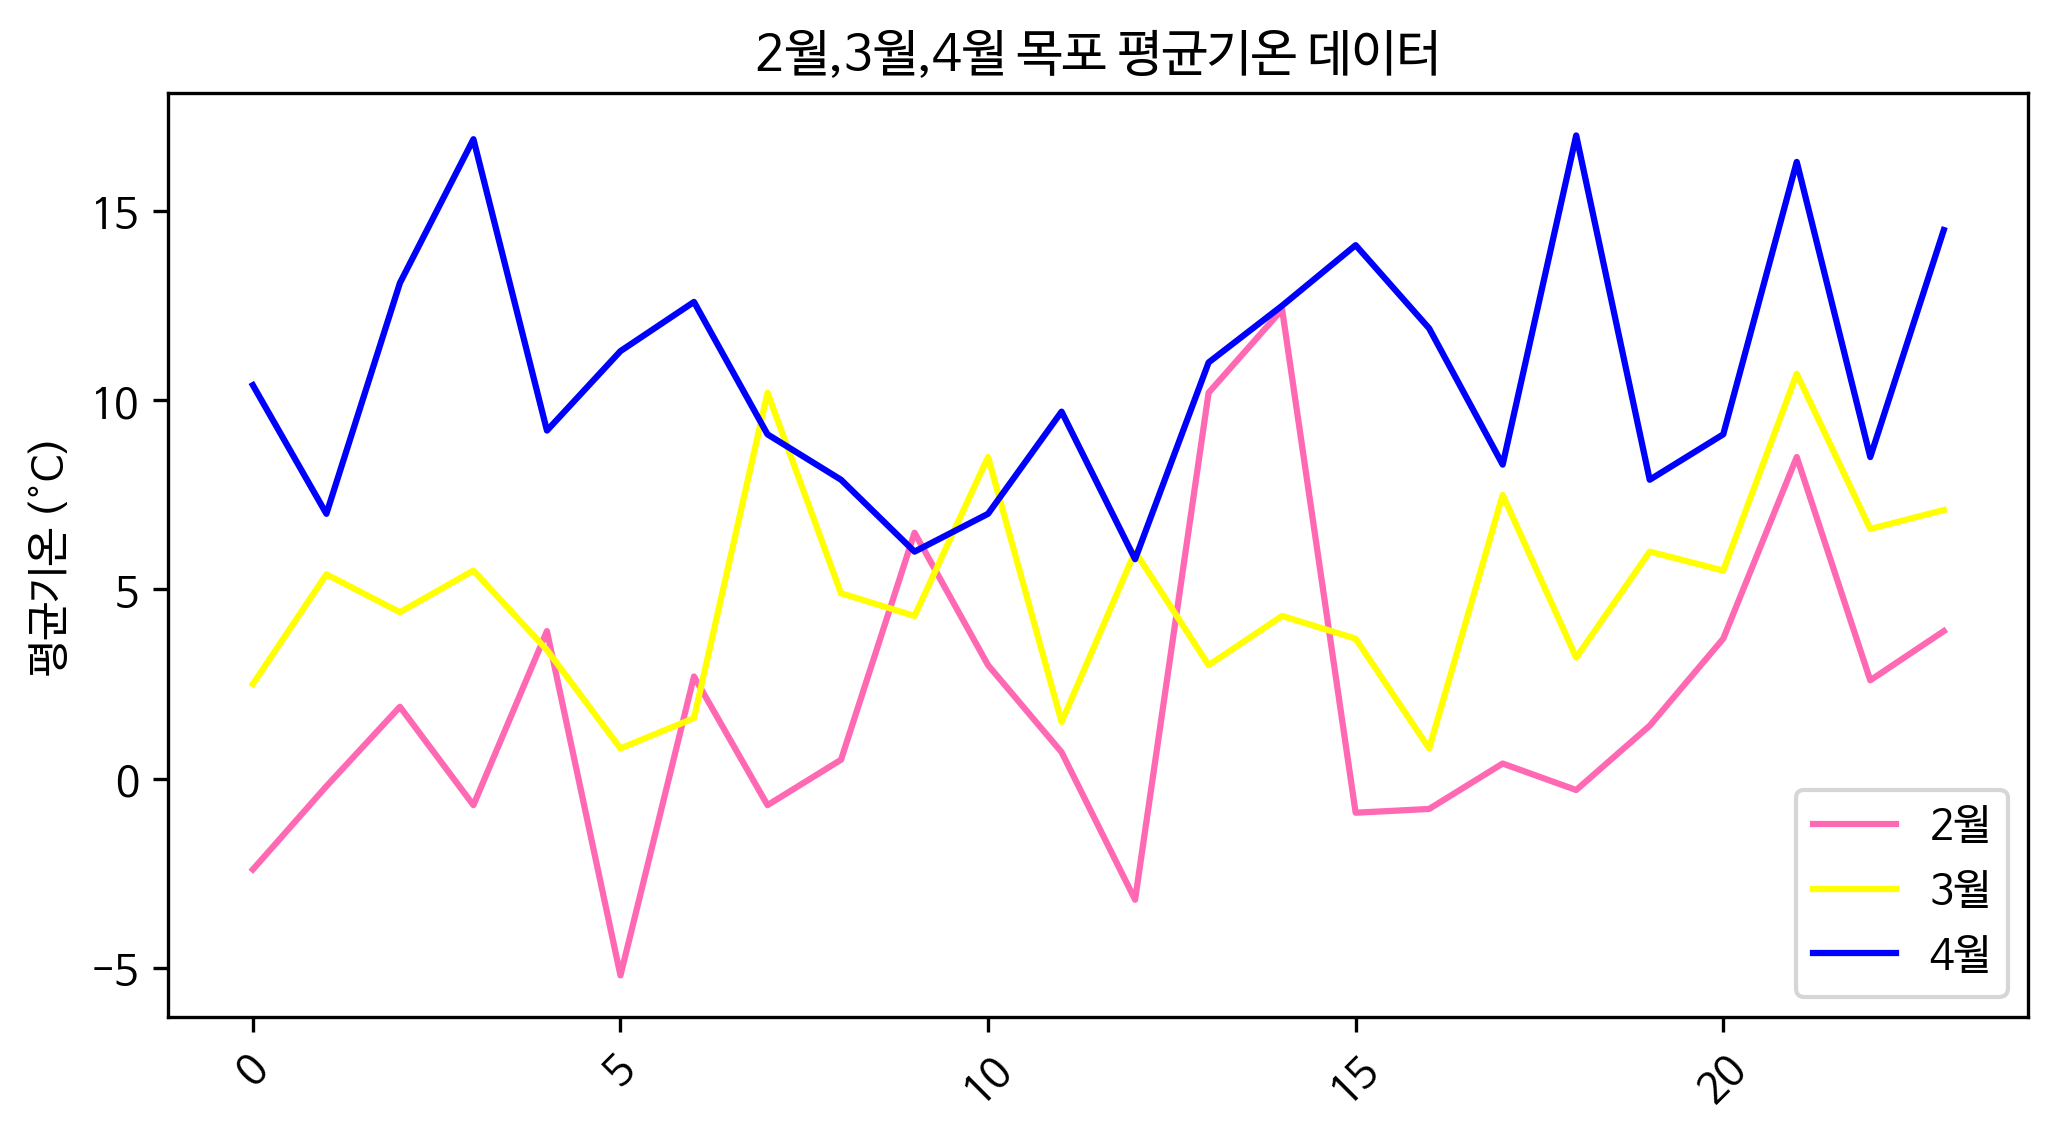

In [6]:
import csv
import matplotlib.pyplot as plt

fm = open('mokpo2000.csv', 'r', encoding='utf-8')
data_m = csv.reader(fm)
next(data_m)

plt.figure(figsize = (8,4), dpi = 300)  #dpi를 높이면 고해상도 그림 출력

years = []
feb_temperature = []
mar_temperature = []
apr_temperature = []

#년도와 월 추출
for row in data_m:
    if row[2] != '': # 평균기온 데이터 값이 존재한다면
        if row[0].split('-')[1] == '02' and row[0].split('-')[2] == '01' : #날짜가 2월 1일인 경우에만
            feb_temperature.append(float(row[2]))
        elif row[0].split('-')[1] == '03' and row[0].split('-')[2] == '01' : #날짜가 3월 1일인 경우에만
            mar_temperature.append(float(row[2]))
        elif row[0].split('-')[1] == '04' and row[0].split('-')[2] == '01' : #날짜가 4월 1일인 경우에만
            apr_temperature.append(float(row[2]))


plt.plot(feb_temperature, 'hotpink', label='2월')
plt.plot(mar_temperature, 'yellow', label='3월')
plt.plot(apr_temperature, 'blue', label='4월')

plt.rc('font', family = 'NanumBarunGothic') # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.ylabel('평균기온 (°C)')
plt.title('2월,3월,4월 목포 평균기온 데이터')
plt.xticks(rotation=45)
plt.legend()
plt.show()

위 그래프에서도 볼 수 있듯이 꽃이 피는 시기인 2,3,4월의 평균기온을 살펴보면 목포에서도 2000년대 초반에 비해 지속적으로 상승하고 있는 것으로 보인다.

따라서 지구온난화로 봄꽃 개화시기가 목포지역에서도 앞당겨지는 것으로 알 수 있다.

상관관계 분석을 위해

[기상청 기상자료개방포털](https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do)
에서 년도별 목포 평균기온 데이터를 가져왔다.

- mokpo_avg.csv (1904년부터 목포의 평균기온 파일)
- mokpo_flower.csv (1921년부터 4개 꽃의 개화날짜 파일)

In [7]:
from google.colab import files
uploaded_file3 = files.upload()
uploaded_file4 = files.upload()

Saving mokpo_avg.csv to mokpo_avg.csv


Saving mokpo_flower.csv to mokpo_flower.csv


In [8]:
import csv

# 목포 평균기온 파일
fmt = open('mokpo_avg.csv', 'r', encoding='cp949')
data_mt = csv.reader(fmt)
header_mt = next(data_mt) # 헤더 저장

print(header_mt)

for row in data_mt :
    print(row)

['년도', '평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '\t최고기온일자', '평균최저기온(℃)', '최저기온(℃)', '최저기온일자']
['1904', '', '', '30.3', '1904.8.16', '', '', '']
['1905', '', '', '30.7', '1905.7.17', '', '', '']
['1906', '12.8', '16.7', '33', '1906.7.24', '10', '-8.4', '1906.1.20']
['1907', '13.1', '17.7', '32.7', '1907.8.27', '9.9', '-8.2', '1907.2.2']
['1908', '12.8', '17', '33.6', '1908.8.19', '9.6', '-5.7', '1908.1.23']
['1909', '12.9', '17.2', '33.6', '1909.8.6', '9.6', '-8.5', '1909.2.7']
['1910', '12.6', '17', '33.2', '1910.8.25', '9.5', '-12.4', '1910.1.31']
['1911', '13', '17.3', '32.2', '1911.9.1', '9.8', '-9.3', '1911.1.24']
['1912', '12.7', '17.4', '32.9', '1912.7.30', '9.4', '-8', '1912.12.24']
['1913', '12.4', '17.5', '33.2', '1913.8.16', '8.8', '-10.7', '1913.2.10']
['1914', '14.1', '18.2', '34.7', '1914.8.22', '10.8', '-6.2', '1914.1.7']
['1915', '13.3', '17.4', '33.4', '1915.7.26', '9.9', '-14.2', '1915.1.13']
['1916', '13.1', '17.8', '32.1', '1916.8.18', '9.7', '-11', '1916.12.27']
['1917', 

목포의 기온데이터는 1904년부터 2022년까지 나타나있는 것을 볼 수 있다.
이 데이터에서 일시와 평균기온 데이터만 남겨서 파일로 따로 저장하도록 하겠다.

In [9]:
import pandas as pd

# 데이터 불러오기
mokpo_temp = pd.read_csv('mokpo_avg.csv', encoding='cp949')
# '일시'와 '평균기온(℃)' 열만 남기기
selected_data = mokpo_temp[['년도', '평균기온(℃)']]
# CSV 파일을 UTF-8로 저장
selected_data.to_csv('mokpo_avg_temp.csv', encoding='utf-8', index=False)

한국민족문화대백과사전 에 따르면 오늘날 논의되는 온난화는 1970년대 이후의 기온 상승이다.
따라서 1970년을 기준으로 목포의 평균기온 그래프를 그려보았다.

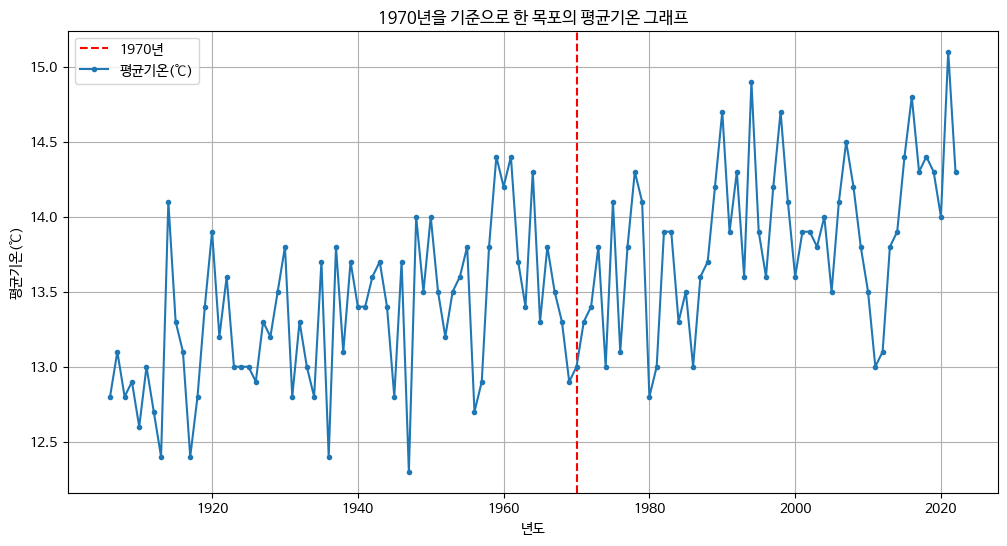

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# mokpo_avg_temp.csv 파일 불러오기
avg_temp_df = pd.read_csv("mokpo_avg_temp.csv")

# 그래프 설정
plt.figure(figsize=(12, 6))

# 1970년을 기준으로 빨간색 선 그리기
plt.axvline(x=1970, color='red', linestyle='--', label='1970년')

# 평균기온 그래프 그리기
plt.plot(avg_temp_df['년도'], avg_temp_df['평균기온(℃)'], label='평균기온(℃)', marker='o', markersize=3)

# 그래프 레이블 및 제목 설정
plt.xlabel('년도')
plt.ylabel('평균기온(℃)')
plt.title('1970년을 기준으로 한 목포의 평균기온 그래프')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


1970년을 기준으로 한 목포의 평균기온 그래프를 살펴보면 기온이 눈에 띄게 상승하고 있는 것을 확인할 수 있다.

이후 앞서 가져왔던 2000년도 이후의 데이터로는 지구온난화의 영향을 쉽게 파악할 수 없기 때문에 1921년부터의 봄꽃 데이터를 가져왔다.

In [12]:
import csv
import pandas as pd

# 목포 벚꽃 개화날짜 파일
fmf = open('mokpo_flower.csv', 'r', encoding='cp949')
data_mf = csv.reader(fmf)
header_mf = next(data_mf) # 헤더 저장

print(header_mf)

for row in data_mf :
    print(row)


['년도', '진달래', '매화', '개나리', '벚나무']
['1921', '1921.4.10', '결측', '결측', '1921.4.15']
['1922', '1922.3.30', '결측', '결측', '1922.4.9']
['1923', '1923.3.26', '결측', '결측', '1923.4.16']
['1924', '1924.4.10', '결측', '결측', '1924.4.16']
['1925', '1925.4.3', '결측', '결측', '1925.4.14']
['1926', '1926.4.5', '결측', '결측', '1926.4.10']
['1927', '1927.3.25', '결측', '결측', '1927.4.12']
['1928', '1928.3.25', '결측', '결측', '1928.4.8']
['1929', '1929.3.29', '결측', '결측', '1929.4.7']
['1930', '1930.3.5', '1930.2.2', '결측', '1930.3.28']
['1931', '1931.3.28', '1931.3.16', '1931.5.18', '1931.4.8']
['1932', '1932.3.25', '1932.3.5', '결측', '1932.4.13']
['1933', '1933.3.31', '1933.3.10', '결측', '1933.4.17']
['1934', '1934.3.30', '1934.3.22', '1934.4.8', '1934.4.11']
['1935', '1935.3.25', '1935.3.9', '결측', '1935.3.31']
['1936', '1936.4.22', '1936.4.15', '결측', '1936.4.19']
['1937', '1937.3.14', '1937.3.17', '1937.3.23', '1937.4.17']
['1938', '1938.3.18', '1938.3.25', '1938.3.26', '1938.4.7']
['1939', '1939.4.5', '1939.3.20', '1939.4

1921년부터의 목포 벚꽃 개화날짜 데이터를 월.일만 추출하여 데이터프레임으로 저장하여 개화날짜를 전체 그래프로 나타내보겠다.
또한 지구온난화의 기온 상승 시기인 1970년을 빨간 축으로 나타내보겠다.

In [13]:
import csv
import pandas as pd

# 목포 벚꽃 개화날짜 파일 (1921년 ~ 2023년)
fmf = open('mokpo_flower.csv', 'r', encoding='cp949')
data_mf = csv.reader(fmf)
header_mf = next(data_mf)  # 헤더 저장

# 데이터를 리스트로 저장
data_list = list(data_mf)

# 데이터프레임으로 데이터 로드
df1 = pd.DataFrame(data_list, columns=header_mf)

# '월'과 '일' 정보만 추출
for column in df1.columns[1:]:
    df1[column] = df1[column].apply(lambda x: '.'.join(x.split('.')[1:3]))

# 결과 출력
print(df1)
df1.to_csv('mokpo_flowers.csv', encoding='utf-8', index=False)


       년도   진달래    매화   개나리   벚나무
0    1921  4.10              4.15
1    1922  3.30               4.9
2    1923  3.26              4.16
3    1924  4.10              4.16
4    1925   4.3              4.14
..    ...   ...   ...   ...   ...
98   2019  3.18   3.1  3.19  3.31
99   2020   3.8  2.24  3.20  3.26
100  2021  3.11  3.14  3.12  3.24
101  2022  3.17  3.14  3.30  3.31
102  2023  3.17  3.20  3.17  3.26

[103 rows x 5 columns]


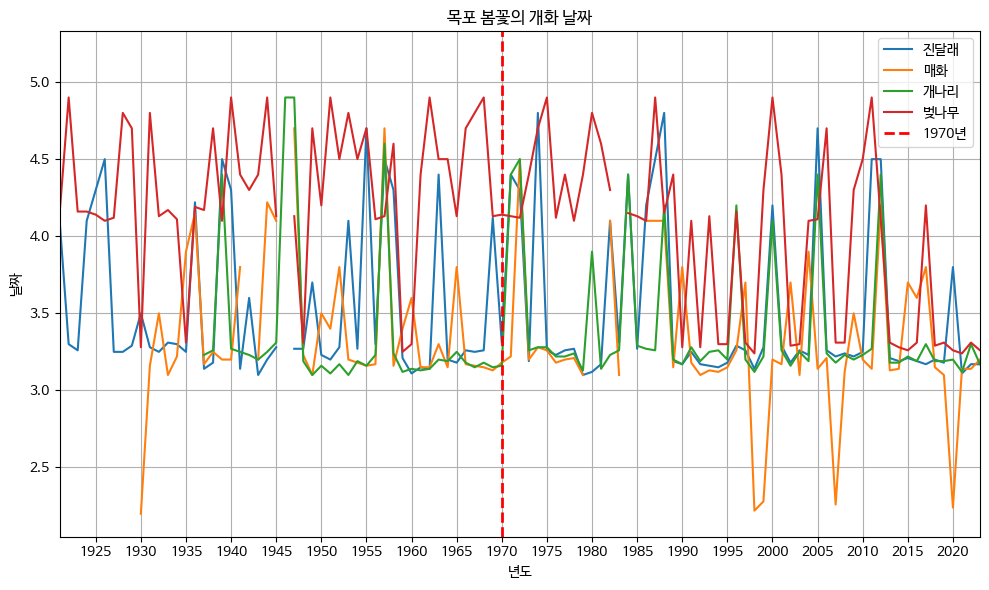

In [14]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# mokpo_flowers.csv 파일 읽기
df1 = pd.read_csv('mokpo_flowers.csv')
df1 = df1[['년도', '진달래', '매화', '개나리', '벚나무']]

# 년도를 datetime 형식으로 변환
df1['년도'] = pd.to_datetime(df1['년도'], format='%Y')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
# x축 설정: 년도 표시
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))  # 5년 단위로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 년도 형식으로 표시

# x축 범위 설정
ax.set_xlim(df1['년도'].min(), df1['년도'].max())

# 그래프 그리기
for flower in ['진달래', '매화', '개나리', '벚나무']:
    ax.plot(df1['년도'], df1[flower], label=flower)

# 1970년에 빨간 선 그리기
plt.axvline(pd.to_datetime('1970'), color='red', linestyle='--', label='1970년', linewidth=2)

# 범례 표시
ax.legend()

# 그래프 제목 및 축 레이블 설정
plt.rc('font', family='NanumBarunGothic')  # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.title('목포 봄꽃의 개화 날짜')
plt.xlabel('년도')
plt.ylabel('날짜')

# 그래프 출력
plt.grid(visible=True)
plt.tight_layout()
plt.show()


위처럼 목포 전체 봄꽃 개화날짜 그래프를 살펴보면 지구온난화의 기온상승 시기인 1970년대 후를 중점으로 보면

진달래, 개나리는 비교적 일정한 속도로 개화날짜가 빨리지는 것을 볼 수 있다.

매화는 약 10년 시기마다 개화날짜가 급격하게 빨라지는 것을 볼 수 있고 벚나무는 다른 봄꽃에 비해 빠른 속도로 개화날짜가 빨라지는 것을 볼 수 있다.

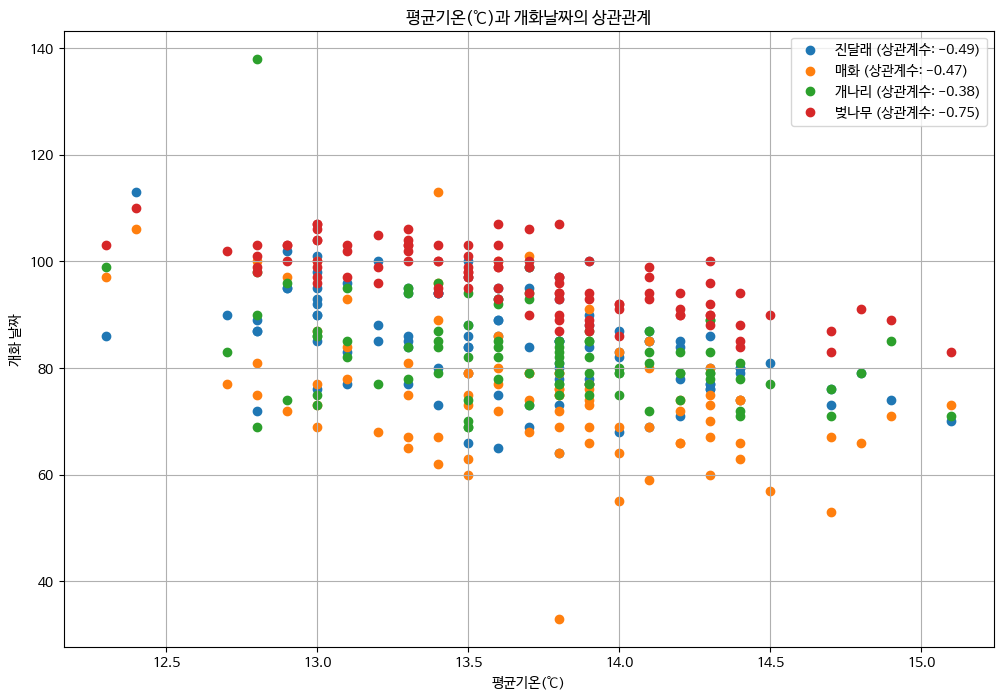

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# mokpo_avg_temp.csv 파일 불러오기
mokpo_temperature = pd.read_csv("mokpo_avg_temp.csv")
# mokpo_flower.csv 파일 불러오기
mokpo_flowers = pd.read_csv("mokpo_flower.csv", encoding="EUC-KR")

# "결측" 값을 NaN으로 대체
mokpo_flowers.replace("결측", np.nan, inplace=True)

# 데이터 병합
merged_df = pd.merge(mokpo_temperature, mokpo_flowers, on="년도", how="inner")

# 4개 종류의 꽃과 평균기온(℃) 간의 상관관계 계산 및 시각화
flowers = ["진달래", "매화", "개나리", "벚나무"]

plt.figure(figsize=(12, 8))

for flower in flowers:
    correlation = merged_df["평균기온(℃)"].corr(pd.to_datetime(merged_df[flower], format='%Y.%m.%d', errors='coerce').dt.dayofyear)
    plt.scatter(merged_df["평균기온(℃)"], pd.to_datetime(merged_df[flower], format='%Y.%m.%d', errors='coerce').dt.dayofyear, label=f'{flower} (상관계수: {correlation:.2f})')

plt.title('평균기온(℃)과 개화날짜의 상관관계')
plt.xlabel('평균기온(℃)')
plt.ylabel('개화 날짜')
plt.legend()
plt.grid(True)
plt.show()


목포 봄꽃의 개화날짜와 평균기온의 관계를 눈으로 확인하기 위해 산점도를 그려보았다.

객관성을 높이기 위해 두 변수 x,y 사이의 상관관계의 정도를 나타내는 수치인 상관계수를 구했다.

4개의 꽃 모두 상관계수가 현재 **음의 상관관계**를 띄고 있다.

따라서 각 꽃들은 다음과 같다고 볼 수 있다.

- 진달래 : 평균기온이 상대적으로 높을수록 진달래의 개화날짜가 빠르다.
- 매화 : 평균기온이 높을수록 매화의 개화날짜가 빠르다.
- 개나리 : 평균기온이 높을수록 개나리의 개화날짜가 빠르나, 진달래나 매화에 비해 약간 객관성이 떨어진다고 볼 수 있다.
- 벚나무 : 평균기온이 높을수록 벚나무의 개화날짜가 빨라진다.